In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import dxfgrabber
import numpy as np

In [55]:
dxf = dxfgrabber.readfile("extensor_hood_test001.dxf")

for layer in dxf.layers:
    print(layer.name)

0
stop_points
shitagaki
polly_lines
particle_points


In [56]:
all_stop_points_en      = [e for e in dxf.entities if e.layer == 'stop_points']         ##  only CIRCLE
all_polly_lines_en        = [e for e in dxf.entities if e.layer == 'polly_lines']           ##  only LWPOLYLINE
all_particle_points_en  = [e for e in dxf.entities if e.layer == 'particle_points']   ##  only CIRCLE

In [57]:
## 固定パーティクルの座標が格納
stop_points = []
for circle in all_stop_points_en:
    x = int(circle.center[0])
    y = int(circle.center[1])
    stop_points.append([x, y])

## ポリラインの頂点座標が格納
poly_lines = []
for lw_polyline in all_polly_lines_en:
    lump = []
    for cood in lw_polyline.points:
        x = int(cood[0])
        y = int(cood[1])
        lump.append([x, y])
    poly_lines.append(lump)

## パーティクルの座標が格納
particle_points = []
for circle in all_particle_points_en:
    x = int(circle.center[0])
    y = int(circle.center[1])
    particle_points.append([x, y])

In [58]:
# 重複要素の消去
def get_unique_list(seq):
    seen = []
    return [x for x in seq if x not in seen and not seen.append(x)]

In [59]:
print("Clearing duplicate particles : ", len(particle_points), "-->", len(get_unique_list(particle_points)))
particle_points = get_unique_list(particle_points)

Clearing duplicate particles :  66 --> 64


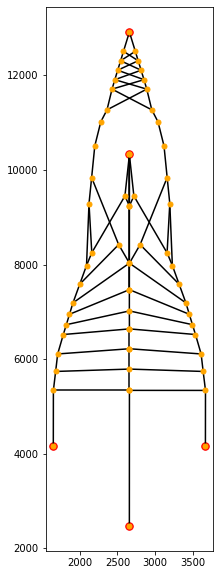

In [75]:
plt.figure(figsize=(3, 10))

for s_point in stop_points:
    plt.plot(s_point[0], s_point[1], marker='.', markersize=15, color='red')

for lines in poly_lines:
    top_count = len(lines)
    for i in range(top_count-1):
        plt.plot([lines[i][0], lines[i+1][0]],[lines[i][1], lines[i+1][1]], 'k-')
        
for p_point in particle_points:
    plt.plot(p_point[0], p_point[1], marker='.', markersize=10, color='orange')